In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
filepath = '../../../Project/data/'

In [18]:
recidivism_df = pd.read_csv(filepath + 'recidivism_dataset.csv')

In [19]:
recidivism_df.head()

,Unnamed: 0,ID_VARIABLE,NEW_DOS,NEW_DOF,PRS,NEW_INC_SANCTION_EXISTS,ADJ_JPMIN,AT_RISK_DT,COUNTY,NEXT_DOF,TIME_TO_RECIDIVATE,RECIDIVISM_3Y,RECIDIVISM_5Y,OGS,DOB,OFF_RACE,OFF_SEX
0,0,1000001,2010-02-18,2009-06-25,0,Y,16.0,2010-03-06,Schuylkill,NaN,NaN,0,0,3.0,1990-05-28,White,M
1,1,1000002,2017-01-31,2015-09-01,4,Y,120.0,2017-05-31,Somerset,NaN,NaN,0,0,3.0,1958-07-12,White,F
2,2,1000003,2002-05-08,2001-09-07,0,N,0.0,2002-05-08,Northampton,2009-03-04,2492.0,0,0,3.0,1961-08-14,White,F
3,3,1000003,2009-03-04,2009-03-04,3,Y,92.0,2009-06-04,Northampton,NaN,NaN,0,0,3.0,1961-08-14,White,F
4,4,1000004,2013-12-10,2013-09-19,0,N,0.0,2013-12-10,Franklin,2018-07-09,1672.0,0,1,1.0,1993-09-21,Unknown,M


In [20]:
recidivism_df['NEW_DOF'] = pd.to_datetime(recidivism_df['NEW_DOF'])
recidivism_df['NEW_DOS'] = pd.to_datetime(recidivism_df['NEW_DOS'])

In [118]:
recidivism_df['NEXT_DOF'] = pd.to_datetime(recidivism_df['NEXT_DOF'])

### Time to Conviction Analysis

In [21]:
time_to_conviction = recidivism_df['NEW_DOS'] - recidivism_df['NEW_DOF']

In [22]:
time_to_conviction.describe()

count                        1118542
mean     358 days 19:58:06.812654332
std      375 days 10:05:50.195467544
min                  0 days 00:00:00
25%                164 days 00:00:00
50%                255 days 00:00:00
75%                415 days 00:00:00
max               7993 days 00:00:00
dtype: object

In [88]:
sns.set_style(style='white') 
palette = ['#9398f2', '#F29398',  '#ffcf6f']
sns.set_palette(palette)
label_color = '#242728'

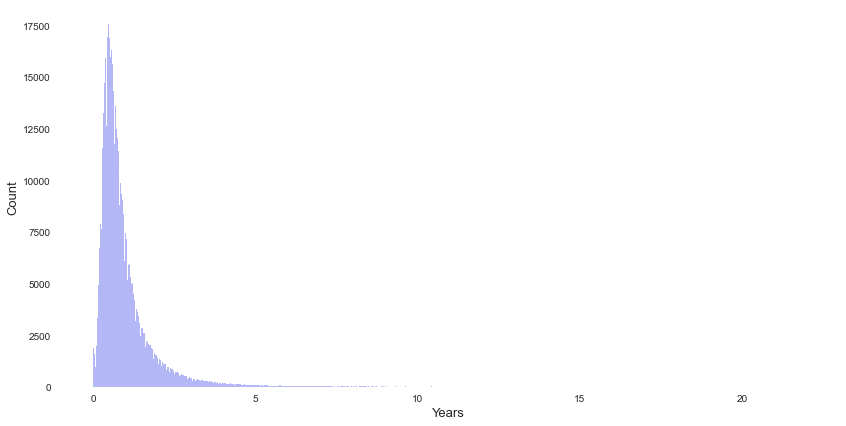

In [63]:
fig, ax = plt.subplots(figsize=(14, 7))

p = sns.histplot(time_to_conviction.dt.days/365,  ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)
#p.set_title('# of Years Between DOF and DOS', fontsize=16)
p.set_ylabel('Count', fontsize=13)
p.set_xlabel('Years', fontsize=13)
plt.show()

### Cohort Analysis

In [97]:
(time_to_conviction.dt.days<=4*365).sum()/len(time_to_conviction)

0.98084291872813

In [66]:
recidivism_df['YOS'] = recidivism_df['NEW_DOS'].dt.year

In [98]:
def create_sentencing_cohorts(x):
    if x <= 2005:
        cohort = '2001-2005'
    elif x <= 2012:
        cohort = '2006-2012'
    elif x <= 2015: 
        cohort = '2013-2015'
    else: 
        return np.nan
    return cohort

In [76]:
recidivism_df['SENTENCING_COHORT'] = recidivism_df['YOS'].apply(lambda x: create_sentencing_cohorts(x))

In [77]:
recidivism_df['PRS'] = recidivism_df['PRS'].str.upper()

In [78]:
recidivism_counts = recidivism_df[['SENTENCING_COHORT', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'SENTENCING_COHORT']).agg({'RECIDIVISM_3Y':'sum'})
total_counts = recidivism_df[['SENTENCING_COHORT', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'SENTENCING_COHORT']).agg({'RECIDIVISM_3Y':'count'})
recidivism_pct = recidivism_counts.div(total_counts).reset_index()

In [92]:
recidivism_df.groupby(by='SENTENCING_COHORT')['RECIDIVISM_3Y'].count()/len(recidivism_df)

SENTENCING_COHORT
2001-2005    0.231085
2006-2012    0.401250
2013-2015    0.218202
Name: RECIDIVISM_3Y, dtype: float64

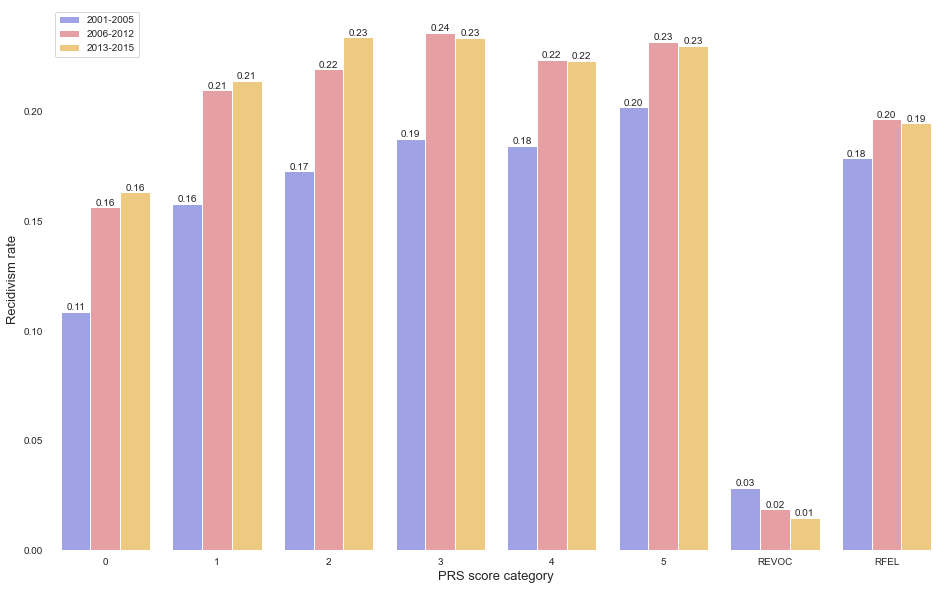

In [89]:
fig, ax = plt.subplots(figsize=(16, 10))
p = sns.barplot(x='PRS', y='RECIDIVISM_3Y', hue='SENTENCING_COHORT', data=recidivism_pct,  ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)
p.set_xlabel('PRS score category', fontsize=13)
p.set_ylabel('Recidivism rate', fontsize=13)
#.set_title('Recidivism Rate by PRS Categories by Sentencing Cohort', fontsize=14)
ax.legend(loc='upper left')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%1.2f')
ax.bar_label(ax.containers[1], label_type='edge', fmt='%1.2f')
ax.bar_label(ax.containers[2], label_type='edge', fmt='%1.2f')

plt.show()

In [94]:
recidivism_df.drop(columns='Unnamed: 0', inplace=True)

In [99]:
recidivism_df.to_csv(filepath + 'recidivism_dataset_v1.csv', index=False)

### Offense category/severity analysis

In [100]:
offense_df = pd.read_csv(filepath + 'PSC_data_trimmed_v1.csv')

C:\Users\audre\AppData\Local\Temp\ipykernel_36240\2586665104.py:1: DtypeWarning: Columns (19,29,45,46,48,49,50,51,52,53,59,63,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  offense_df = pd.read_csv(filepath + 'PSC_data_trimmed_v1.csv')


In [101]:
ofn_label_vars = ['JPR_ID', 'ID_VARIABLE', 'DOS', 'DOF', 'OFN_LABEL', 'LABEL']
offense_df = offense_df[ofn_label_vars].copy()

In [102]:
offense_df['DOS'] = pd.to_datetime(offense_df['DOS'])

In [103]:
offense_df['_DOS'] = offense_df['DOS']
offense_df['DOS'] = offense_df.groupby(by=['ID_VARIABLE', 'JPR_ID'])['DOS'].transform('min')

In [104]:
offense_df['DOF'] = pd.to_datetime(offense_df['DOF'])

In [105]:
offense_df['_DOF'] = offense_df['DOF']
offense_df['DOF'] = offense_df.groupby(by=['ID_VARIABLE', 'JPR_ID'])['DOF'].transform('min')

In [106]:
# There are 79 charges with missing LABEL information. replace with OFN_LABEL column
offense_df['LABEL'].fillna(offense_df['OFN_LABEL'], inplace=True)

##### Recidivism to DUI 

In [108]:
offense_df[offense_df['LABEL'].str.contains('DUI')]['LABEL'].unique()

array(['DUI 97-M2', 'DUI 97-M1', 'Homicide-By Veh (No DUI)',
       'Assault-Agg By Veh while DUI', 'Homicide-By Veh while DUI',
       'Homicide-By Veh (DUI)', 'DUI-M2', 'DUI-M1', 'DUI-M',
       'DUI-M1 Minor Occupant', 'DUI-F3',
       'DUI-high rate of alcohol: BAC .10-<.16 (4th/subsq off)',
       'DUI-general impairment: BAC .08-<.10 (4th/subsq off)',
       'Homicide by vehicle while DUI - prior DUI conviction(s)',
       'DUI-controlled substances: metabolite of Sched I/II/III (3rd/subsq off)',
       'DUI-general impairment: BAC .08-<.10 (3rd off)'], dtype=object)

In [109]:
dui_codes =[i for i in offense_df[offense_df['LABEL'].str.contains('DUI')]['LABEL'].unique() if 'No DUI' not in i]

In [110]:
offense_df['DUI'] = offense_df['LABEL'].apply(lambda x: 1 if x in dui_codes else 0)

It is possible that a person commits multiple offenses on a DOF, including DUI and non-DUI related offenses. For now, we will count it as a DUI offense if 1+ charges committed on that day is a DUI.

In [112]:
dui_observations = offense_df[['ID_VARIABLE', 'DOF', 'DUI']].sort_values(by=['ID_VARIABLE', 'DOF', 'DUI'], ascending=[True, True, False]).groupby(by=['ID_VARIABLE', 'DOF']).first().reset_index()

In [114]:
dui_observations.head()

,ID_VARIABLE,DOF,DUI
0,1000001,2009-06-25,0
1,1000002,2015-09-01,1
2,1000003,2001-09-07,0
3,1000003,2009-03-04,0
4,1000004,2013-09-19,0


In [116]:
recidivism_copy = recidivism_df.copy()

In [119]:
recidivism_df = pd.merge(recidivism_df, dui_observations, left_on=['ID_VARIABLE', 'NEXT_DOF'], right_on=['ID_VARIABLE', 'DOF'], how='left')

In [122]:
recidivism_df.rename(columns={'DUI': 'NEXT_OFN_DUI'}, inplace=True)

In [126]:
recidivism_counts = recidivism_df[['NEXT_OFN_DUI', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'NEXT_OFN_DUI']).agg({'RECIDIVISM_3Y':'sum'})
total_counts = recidivism_df[['NEXT_OFN_DUI', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'NEXT_OFN_DUI']).agg({'RECIDIVISM_3Y':'count'})
recidivism_pct = recidivism_counts.div(total_counts).reset_index()

In [140]:
recidivism_pct['NEXT_OFN_DUI'].replace(to_replace = [0.0, 1.0], value = ['non-DUI', 'DUI'], inplace=True)

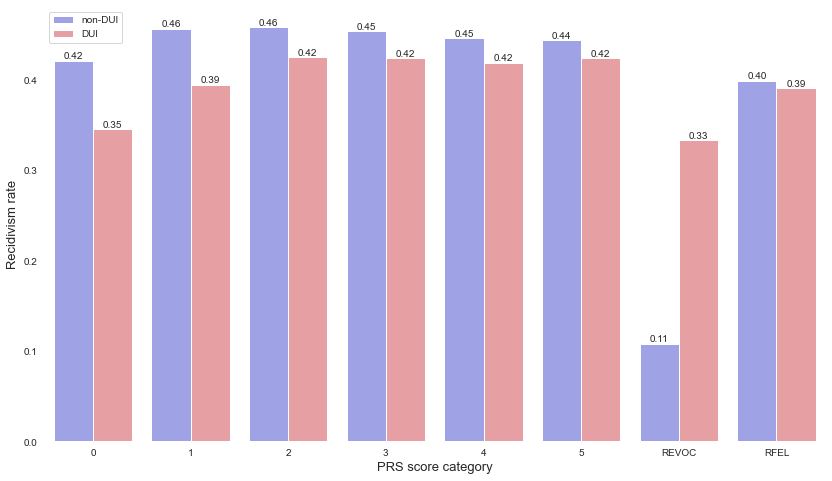

In [143]:
fig, ax = plt.subplots(figsize=(14, 8))
p = sns.barplot(x='PRS', y='RECIDIVISM_3Y', hue='NEXT_OFN_DUI', data=recidivism_pct,  ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)
p.set_xlabel('PRS score category', fontsize=13)
p.set_ylabel('Recidivism rate', fontsize=13)
ax.legend(loc='upper left')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%1.2f')
ax.bar_label(ax.containers[1], label_type='edge', fmt='%1.2f')

plt.show()